### Problem Statement

#### 1) Employee performance problem statement

1. Mean effort spent by various teams on different Projects.


In [1]:
import numpy as np
import pandas as pd

In [6]:
df = pd.read_csv("Hackathon.csv")
df.head()

,Date,Project Name,Hours,Owner,Team,Billing Status
0,23-02-2015,AAA,1.5,sankar,Design,Billable
1,18-02-2015,AAA,1.5,sankar,Design,Billable
2,16-02-2015,AAA,3.0,sankar,Design,Billable
3,13-02-2015,AAA,1.5,sankar,Design,Billable
4,12-02-2015,AAA,6.5,sankar,Design,Billable


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11380 entries, 0 to 11379
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            11380 non-null  object 
 1   Project Name    11380 non-null  object 
 2   Hours           11380 non-null  float64
 3   Owner           11380 non-null  object 
 4   Team            11380 non-null  object 
 5   Billing Status  11380 non-null  object 
dtypes: float64(1), object(5)
memory usage: 533.6+ KB


In [16]:
df["Team"].value_counts()

Dev       6837
PM        2133
Design    1369
QA        1040
0            1
Name: Team, dtype: int64

In [86]:
lst=list(df["Team"])
type(lst)

list

In [96]:
index = lst.index("0")
index

2779

In [97]:
df = df.drop(labels = index,axis = 0)

In [99]:
df["Team"].value_counts()

Dev       6837
PM        2133
Design    1369
QA        1040
Name: Team, dtype: int64

In [107]:
dfmean =df.groupby(["Team","Project Name"]).mean("Hours")
dfmean

Hours
Team   Project Name          
Design AA1           5.189074
       AA2           5.290000
       AAA           3.972222
       BB1           4.233273
       CC1           3.770833

In [108]:
dfmean.reset_index(inplace = True)
dfmean

,Team,Project Name,Hours
0,Design,AA1,5.189074
1,Design,AA2,5.290000
2,Design,AAA,3.972222
3,Design,BB1,4.233273
4,Design,CC1,3.770833
...,...,...,...
139,QA,TTT,2.213333
140,QA,UU1,8.428571
141,QA,UUU,2.931212
142,QA,XX1,8.009524


In [111]:
import matplotlib.pyplot as plt
import seaborn as sns

#### This Scatter Plot shows the Mean Time for a Project with Respect to the Team

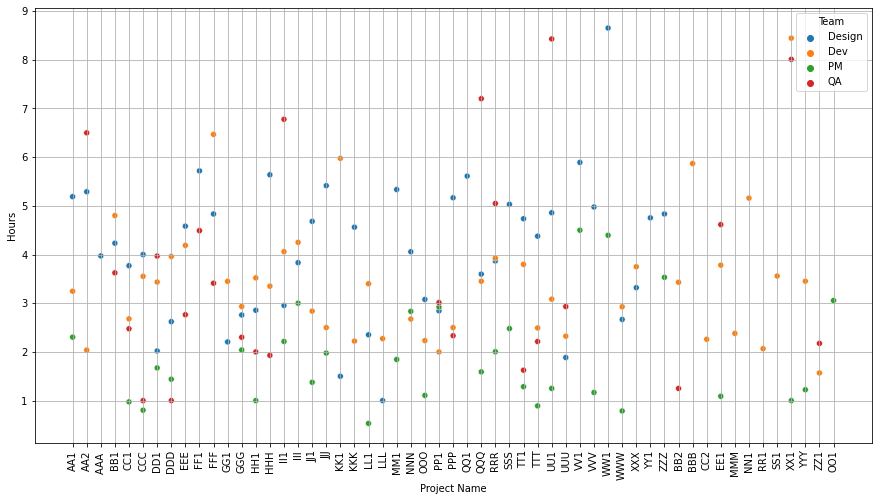

In [139]:
plt.figure(figsize = (15,8))
sns.scatterplot(data=dfmean, x="Project Name",y = "Hours",hue = "Team")
plt.xticks(rotation = 90)
plt.grid()
plt.show()


2). 5 Employees with the lowest efficiency

considering low Efficiency as lowest mean working Hours i.e (total hours/no of days)

In [140]:
df.head()

,Date,Project Name,Hours,Owner,Team,Billing Status
0,23-02-2015,AAA,1.5,sankar,Design,Billable
1,18-02-2015,AAA,1.5,sankar,Design,Billable
2,16-02-2015,AAA,3.0,sankar,Design,Billable
3,13-02-2015,AAA,1.5,sankar,Design,Billable
4,12-02-2015,AAA,6.5,sankar,Design,Billable


In [157]:
dfeff = df.groupby("Owner").mean("Hours").reset_index()
dfeff

,Owner,Hours
0,Akhila Kannan,1.233571
1,Alagujeyaraj G,2.728511
2,Arunchinnapparaj,8.873902
3,Dharini,3.533654
4,Gerard Benedict,0.635385
5,Jayakumar,3.992512
6,Karthikeyan G,2.872895
7,Kumaresan P,2.183559
8,Murali,4.260823
9,Muthu Chezhiyan,3.484239


In [158]:
dflow=dfeff.sort_values("Hours").reset_index(drop = True).head()

In [159]:
dflow

,Owner,Hours
0,Gerard Benedict,0.635385
1,shalini,1.165429
2,ithayakumar Durairaj,1.204857
3,Akhila Kannan,1.233571
4,saravanan,1.291045
